In [1]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [2]:
import os
os.environ['KAGGLE_CONFIG_DIR'] = 'content/gdrive/My Drive/kaggle_dataset'

In [3]:
%cd /content/gdrive/My Drive/kaggle_dataset

/content/gdrive/My Drive/kaggle_dataset


In [4]:
!ls

Churn_Modelling.csv  content  kaggle.json


In [5]:
!kaggle datasets download -d rahulharikumarr/Churn Modelling.csv

Traceback (most recent call last):
  File "/usr/local/bin/kaggle", line 5, in <module>
    from kaggle.cli import main
  File "/usr/local/lib/python3.10/dist-packages/kaggle/__init__.py", line 23, in <module>
    api.authenticate()
  File "/usr/local/lib/python3.10/dist-packages/kaggle/api/kaggle_api_extended.py", line 164, in authenticate
    raise IOError('Could not find {}. Make sure it\'s located in'
OSError: Could not find kaggle.json. Make sure it's located in content/gdrive/My Drive/kaggle_dataset. Or use the environment method.


In [6]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
import warnings
warnings.filterwarnings("ignore")
sns.set(style="darkgrid",font_scale=1.5)

In [7]:
df = pd.read_csv('/content/gdrive/MyDrive/kaggle_dataset/Churn_Modelling.csv')

In [8]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [9]:
df.count()

RowNumber          10000
CustomerId         10000
Surname            10000
CreditScore        10000
Geography          10000
Gender             10000
Age                10000
Tenure             10000
Balance            10000
NumOfProducts      10000
HasCrCard          10000
IsActiveMember     10000
EstimatedSalary    10000
Exited             10000
dtype: int64

In [10]:
df.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [12]:
df.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

**This dataset (conveniently enough) has no null/missing values. We will come back to this later once we have looked through and have a decent idea of the contents of the dataset**

In [13]:
df.drop(columns=["RowNumber","CustomerId", "Surname"], inplace = True)

In [14]:
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [15]:
df

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...
9995,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


In [16]:
df.describe()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


We see that 75% of the customers have a tenure that is less than 7 years


Also, 25% of the customers have more than 2 products

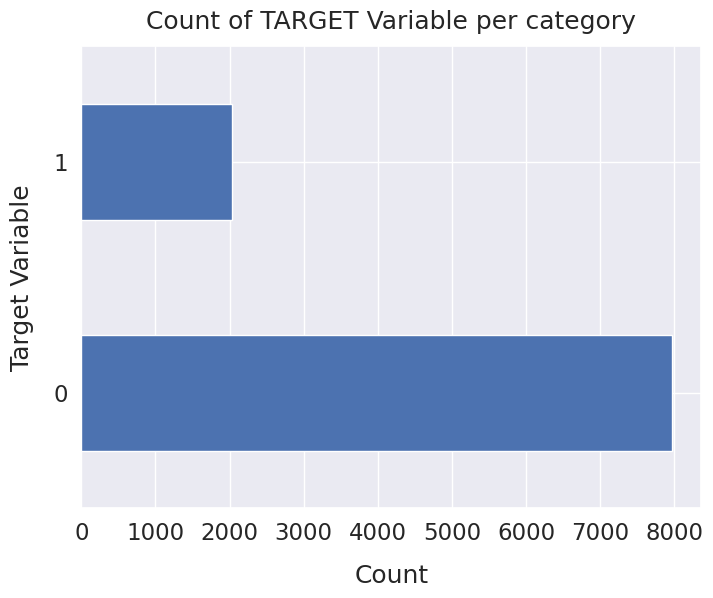

In [17]:
df['Exited'].value_counts().plot(kind='barh', figsize=(8, 6))
plt.xlabel("Count", labelpad=14)
plt.ylabel("Target Variable", labelpad=14)
plt.title("Count of TARGET Variable per category", y=1.02);

In [18]:
df['Exited'].value_counts()

0    7963
1    2037
Name: Exited, dtype: int64

**Clearly we observe that the number of customers that stay with the company is much higher(7963/10000) than the number of customers that churn/leave.**

In [19]:
100*df['Exited'].value_counts()/len(df['Exited'])

0    79.63
1    20.37
Name: Exited, dtype: float64

So we observe that 79.63% of customers are retained, whereas 20.37% customers have churned/exited.

## **Data Cleaning**

We first create a copy of the data

In [20]:
bank_data = df.copy()

In [21]:
bank_data.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [22]:
bank_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CreditScore      10000 non-null  int64  
 1   Geography        10000 non-null  object 
 2   Gender           10000 non-null  object 
 3   Age              10000 non-null  int64  
 4   Tenure           10000 non-null  int64  
 5   Balance          10000 non-null  float64
 6   NumOfProducts    10000 non-null  int64  
 7   HasCrCard        10000 non-null  int64  
 8   IsActiveMember   10000 non-null  int64  
 9   EstimatedSalary  10000 non-null  float64
 10  Exited           10000 non-null  int64  
dtypes: float64(2), int64(7), object(2)
memory usage: 859.5+ KB


In [23]:
bank_data.isnull().sum()

CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

Since there are no null values, we can skip a step and move on.

We will now segregate the customers into bins depending on their duration of Tenure.

In [24]:
#We first find the max tenure in the dataset
print(bank_data['Tenure'].max())

10


In [25]:
# Group the tenure in bins of 2 years
labels = ["{0} - {1}".format(i, i + 1) for i in range(1, 10, 2)]

bank_data['Tenure_group'] = pd.cut(bank_data.Tenure, range(1, 12, 2), right=False, labels=labels)

We do this because often times, there could be too many unique values of tenures, so it would make more sense for us to classify them into groups, and distinguish customer tenures based on these "bins" we create

In [26]:
bank_data

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Tenure_group
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1,1 - 2
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,1 - 2
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1,7 - 8
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0,1 - 2
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0,1 - 2
...,...,...,...,...,...,...,...,...,...,...,...,...
9995,771,France,Male,39,5,0.00,2,1,0,96270.64,0,5 - 6
9996,516,France,Male,35,10,57369.61,1,1,1,101699.77,0,9 - 10
9997,709,France,Female,36,7,0.00,1,0,1,42085.58,1,7 - 8
9998,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1,3 - 4


Now we have our new column indicating which range of tenure they fall under. Now here I have chosen to use just that one year period, but ideally if the values of tenures found in the data are much higher, we could consider making larger brackets.

In [27]:
bank_data1 = bank_data.drop('Tenure', axis = 'columns')

We are removing our original "Tenure" column since it is no longer necessary for us after we made the new bins.

In [28]:
bank_data1.tail()

,CreditScore,Geography,Gender,Age,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Tenure_group
9995,771,France,Male,39,0.00,2,1,0,96270.64,0,5 - 6
9996,516,France,Male,35,57369.61,1,1,1,101699.77,0,9 - 10
9997,709,France,Female,36,0.00,1,0,1,42085.58,1,7 - 8
9998,772,Germany,Male,42,75075.31,2,1,0,92888.52,1,3 - 4
9999,792,France,Female,28,130142.79,1,1,0,38190.78,0,3 - 4


**Now let's perform a univariate analysis. We do this to compare the correlation that each column(feature) has on our churn result. We plot a graph with our "Exited" status depicted with respect to the various features of our data.**

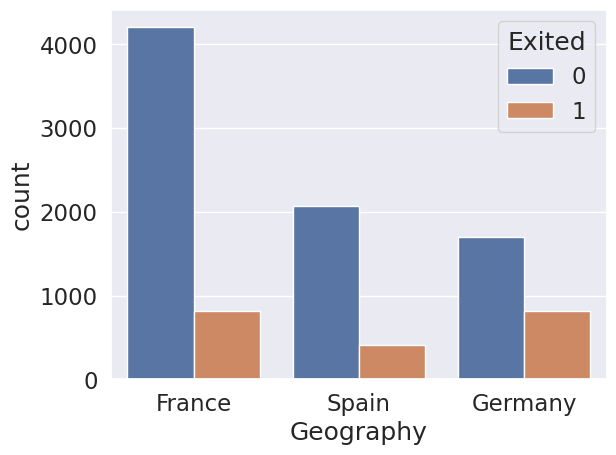

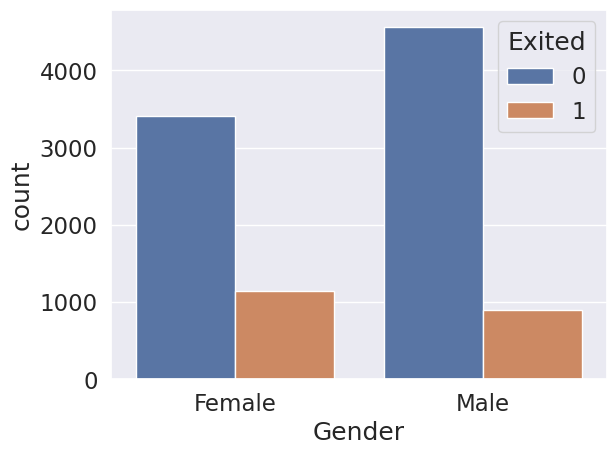

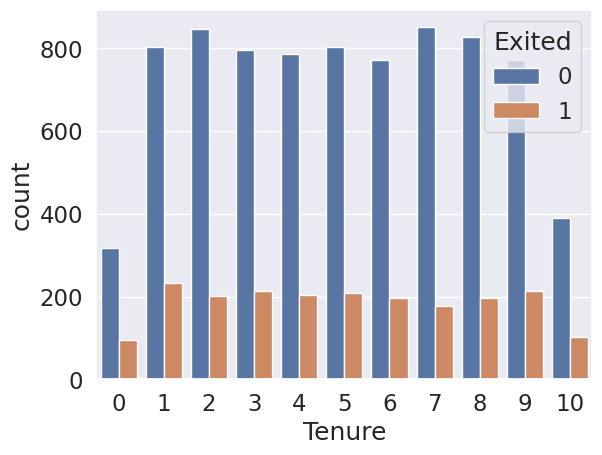

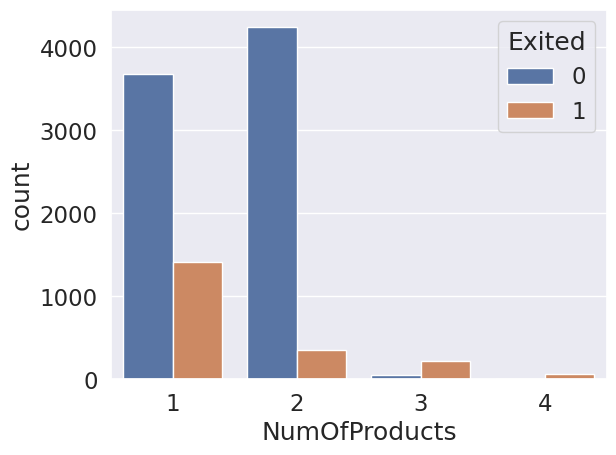

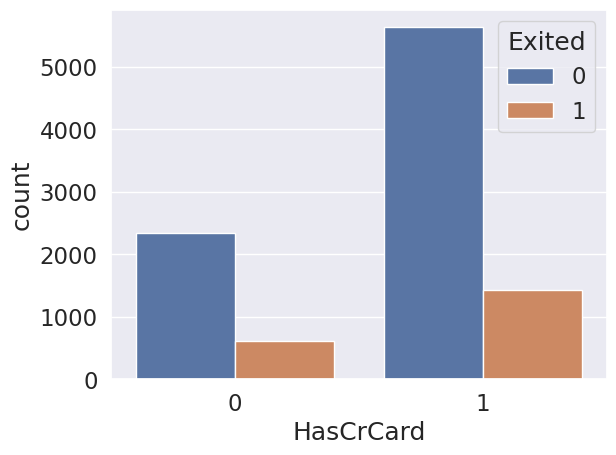

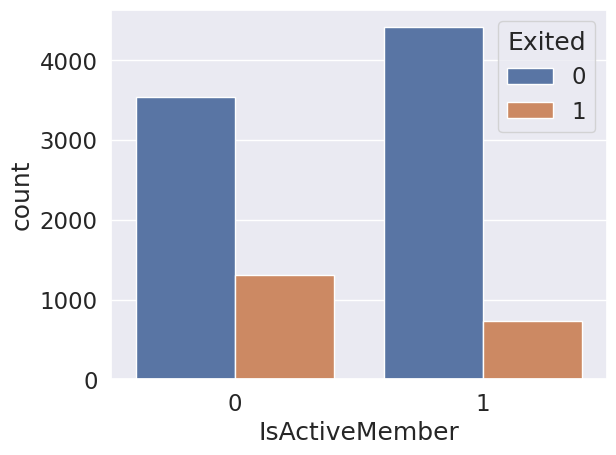

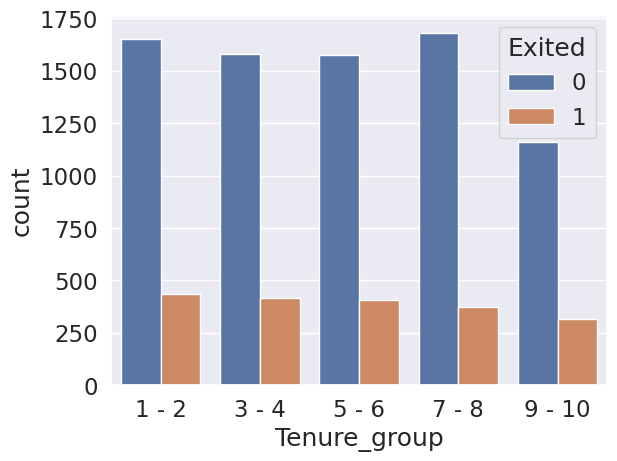

In [29]:
for i, predictor in enumerate(bank_data.drop(columns=['Exited', 'CreditScore', 'EstimatedSalary', 'Age', 'Balance'])):
    plt.figure(i)
    sns.countplot(data=bank_data, x=predictor, hue='Exited')

**From this we can make some basic observations. For instance, we observe that the customers with a credit card (though generally a larger customer population), seem to churn less than the ones without one. Now this analysis is not quite enough because there are other factors. For instance, from the graph it may seem as if customers from France are less likely to churn because of the height of the 0 in the bar plot. However, we must also consider the overall customer count.**

## **Let's now perform a Bivariate Analysis**

In [34]:
bank_data_target0=bank_data.loc[bank_data["Exited"]==0]
bank_data_target1=bank_data.loc[bank_data["Exited"]==1]

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Tenure_group
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,1 - 2
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0,1 - 2
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0,1 - 2
6,822,France,Male,50,7,0.00,2,1,1,10062.80,0,7 - 8
8,501,France,Male,44,4,142051.07,2,0,1,74940.50,0,3 - 4
9,684,France,Male,27,2,134603.88,1,1,1,71725.73,0,1 - 2
10,528,France,Male,31,6,102016.72,2,0,0,80181.12,0,5 - 6
11,497,Spain,Male,24,3,0.00,2,1,0,76390.01,0,3 - 4
12,476,France,Female,34,10,0.00,2,1,0,26260.98,0,9 - 10
13,549,France,Female,25,5,0.00,2,0,0,190857.79,0,5 - 6


In [42]:
def uniplot(df,col,title,hue =None):
    
    sns.set_style('whitegrid')
    sns.set_context('talk')
    plt.rcParams["axes.labelsize"] = 20
    plt.rcParams['axes.titlesize'] = 22
    plt.rcParams['axes.titlepad'] = 30
    
    
    temp = pd.Series(data = hue)
    fig, ax = plt.subplots()
    width = len(df[col].unique()) + 7 + 4*len(temp.unique())
    fig.set_size_inches(width , 8)
    plt.xticks(rotation=45)
    plt.yscale('linear')
    plt.title(title)
    ax = sns.countplot(data = df, x= col, order=df[col].value_counts().index,hue = hue,palette='bright') 
        
    plt.show()

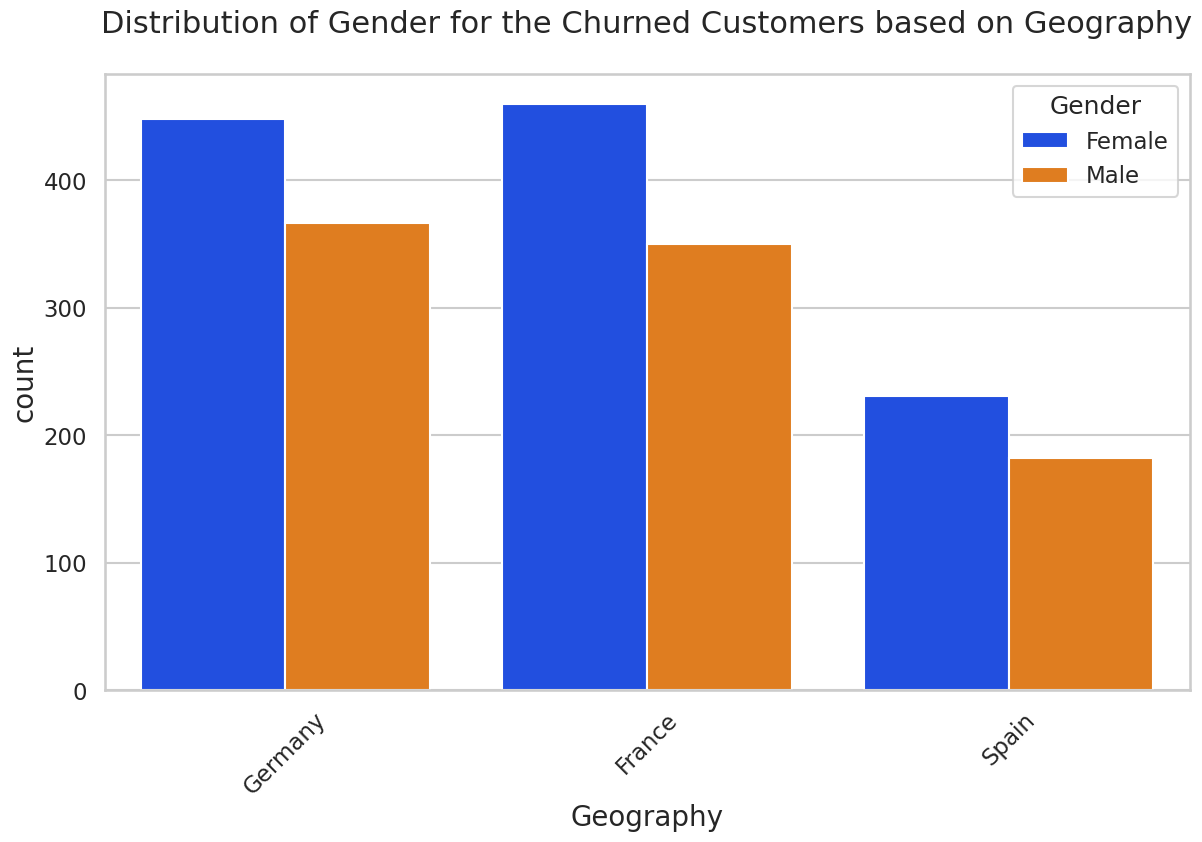

In [43]:
uniplot(bank_data_target1, col = "Geography", title = "Distribution of Gender for the Churned Customers based on Geography", hue = "Gender")

**So here we consider both the geography, as well as the gender to create a distribution plot of the churned customers. What can we infer from this? Perhaps, that the females in Spain are a greater percentage of the churning customers in Spain. Now there could be a variety of reasons for this, but it could be valuable information**

In [44]:
bank_data['NumOfProducts'].unique()

array([1, 3, 2, 4])

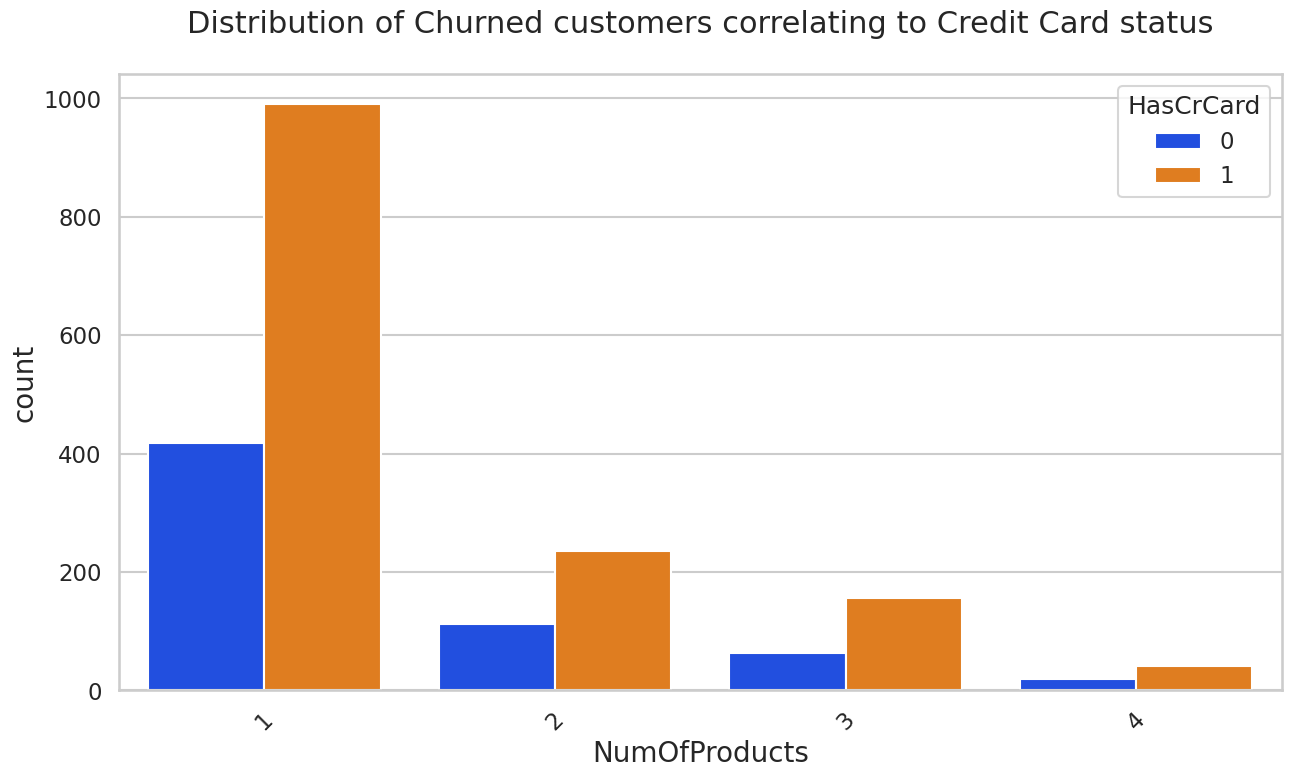

In [45]:
uniplot(bank_data_target1, col = "NumOfProducts", title = "Distribution of Churned customers correlating to Credit Card status", hue = "HasCrCard")

**The above plot takes two features, "NumOfProducts" owned, as well as the "HasCrCard" feature, the count of members churned significantly decreases with increase in the number of products owned(as we observed in the univariate analysis). From the banks perspective, this could be an area to look into, and why the addition of products leaves customers with no further incentive to stay.But the main thing to notice is the massive rise in customers that churned who have both a Credit Card, and also own only one product.**